In [74]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
#from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('../Source/prepocessed_data.csv', sep= ',')

In [3]:
#prof = ProfileReport(df)
#prof.to_file(output_file='Spotify_report.html')

In [4]:
del df['acousticness']
del df['energy']

In [5]:
distortions = []
K = range(1,27)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

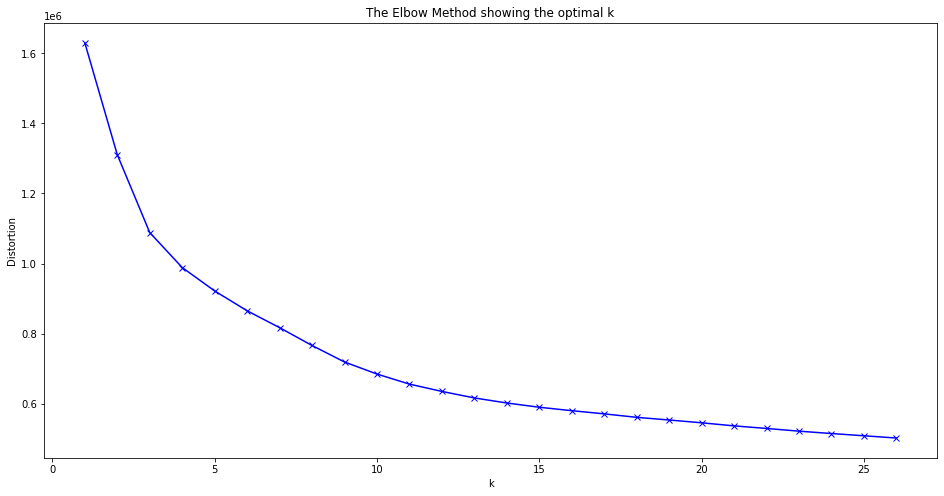

In [6]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

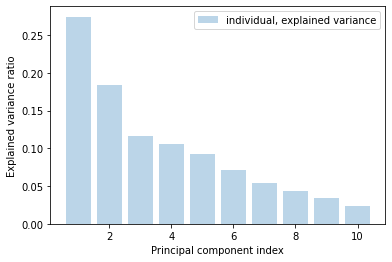

In [7]:
# Compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)
np_df = df.to_numpy()

cov_mat = np.cov(np_df.T)
EVal, EVec = np.linalg.eig(cov_mat)


# Calculate (sum of) explained variances
sum_EVal = sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]
scurr = range(1, 11)


# Plot explained variances
plt.bar(scurr, var_exp, alpha=0.3, align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [8]:
#As we can see in the initial elbow plot there is no real elbow since the distance changes rather smoothly
# Additionally we have to say that 

pca = PCA(n_components=8)
df_pca = pca.fit_transform(df)

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)

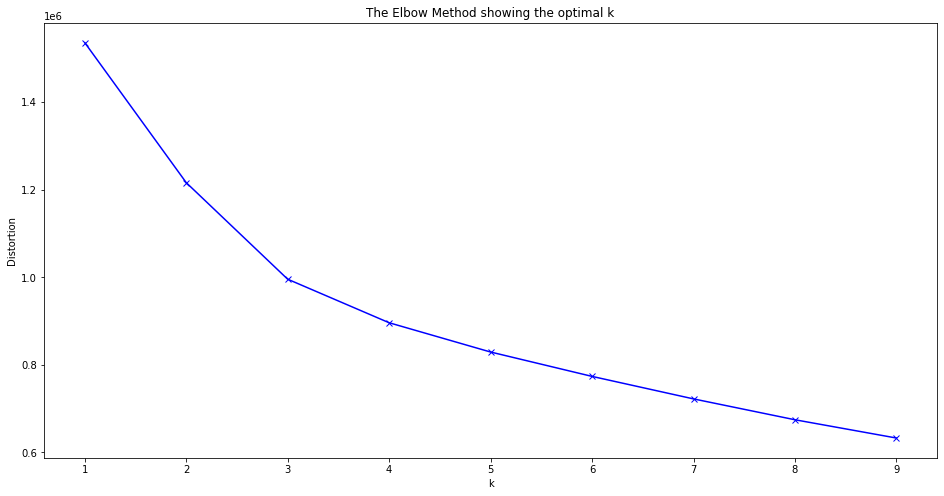

In [9]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=26, max_iter=10000)
X_dist = kmeans.fit_transform(df_pca) 
representative_idx = np.argmin(X_dist, axis=1)

In [11]:
#Man könnte jetzt noch analysieren
Spotify_df = pd.read_csv('../Source/auxiliary_data.csv', sep= ',')

In [12]:
Spotify_df['cluster'] = representative_idx

In [13]:
amount_genres = []
points_per_cluster = []

for k in range(0, 1):
    number_of_points = Spotify_df['genre'].loc[Spotify_df['cluster'] == k].nunique()
    unique_genres = Spotify_df['genre'].loc[Spotify_df['cluster'] == k].unique()

    amount_genres.append(len(unique_genres))
    points_per_cluster.append(number_of_points)

In [14]:
print(amount_genres)
#The next step would be to identify how often a certain genre is in a cluster

[24]


In [25]:
matrix_of_truth = pd.crosstab(Spotify_df['genre'], Spotify_df['cluster'])

In [21]:
matrix_of_truth_columns = pd.crosstab(Spotify_df['genre'], Spotify_df['cluster'], normalize='columns')

In [86]:
matrix_normalized = pd.DataFrame(matrix_of_truth_columns)

In [87]:
#setting a threshold of 3% ir that conditional probability is below we set it to zero
first_lambda  = lambda x: 0 if x < 0.03 else x

In [95]:
matrix_normalized = matrix_normalized.applymap(first_lambda)

In [96]:
second_lambda = lambda r: r/r.sum()
matrix_normalized = matrix_normalized.apply(second_lambda, axis=0)

In [98]:
matrix_normalized.to_html('conditional_probabilities.html')